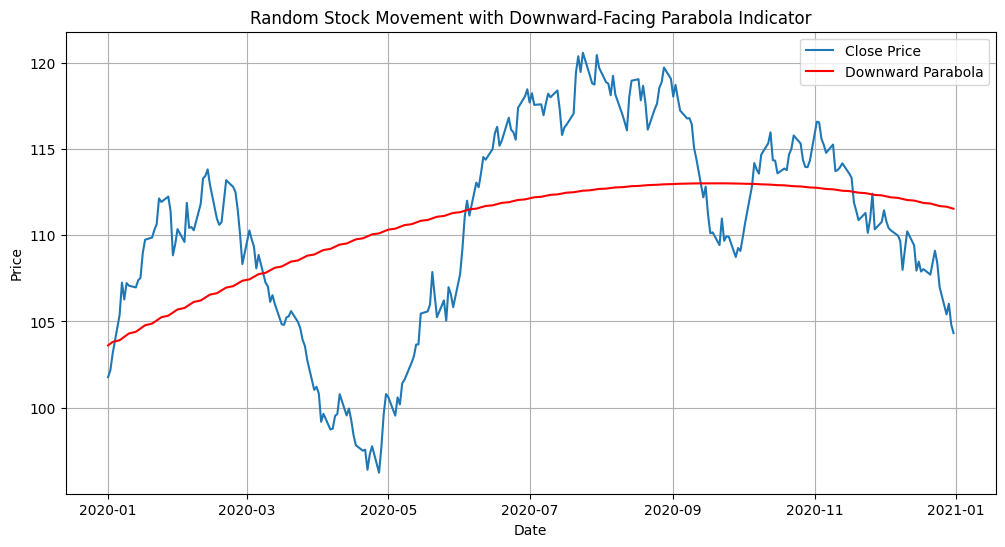

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate random stock movement data
np.random.seed(0)  # Seed for reproducibility
dates = pd.date_range(start="2020-01-01", end="2020-12-31", freq='B')  # Business days in 2020
prices = np.random.normal(0, 1, len(dates)).cumsum() + 100  # Random walk model

# Create a DataFrame
stock_data = pd.DataFrame({'Close': prices}, index=dates)

# Define a function to represent a downward facing parabola
def parabola(x, a, b, c):
    return a * (x - b)**2 + c

# Fit the parabola to the data
# For simplicity, let's assume the peak of the parabola is in the middle of the time period
mid_point = len(stock_data) // 2
peak_price = stock_data.iloc[mid_point]['Close']
popt, _ = curve_fit(parabola, np.arange(len(stock_data)), stock_data['Close'], p0=[-0.01, mid_point, peak_price])

# Plot the stock data and the fitted parabola
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, parabola(np.arange(len(stock_data)), *popt), label='Downward Parabola', color='red')
plt.title('Random Stock Movement with Downward-Facing Parabola Indicator')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
